# **Imported Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# **Importing Dataset**

In [2]:
data = pd.read_csv('/content/solar_power_generation.csv')
data

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                          2.17                               31   
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
0                          1035.0                      0.0   
1                          1035.1                      0.0   
2                          1035.4                      0.0   
3                          1035.4                      0.0   
4                          1034.4                      0.0   
...                           ...                      ...   
4208                       1025.1                      0.0   
4209                       1026.1                      0.0   
4210                       1026.3                      0.1   
4211                       1025.5                      0.0   
4212                       1025.3                      0.0   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
0                     0.0                    0.0   
1                     0.0                    0.0   
2                     0.0                    0.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
4208                  0.0                  100.0   
4209                  0.0                  100.0   
4210                  0.0                  100.0   
4211                  0.0                  100.0   
4212                  0.0                  100.0   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
...                             ...                             ...   
4208                            100                             100   
4209                             79                             100   
4210                             73                             100   
4211                             74                              66   
4212                            100                             100   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
0                               0                               0.00  ...   
1                               0                               1.78  ...   
2                               0                             108.58  ...   
3                               0                             258.10  ...   
4                               0                             375.58  ...   
...                           ...                                ...  ...   
4208                          100                             257.21  ...   
4209                          100                             210.04  ...   
4210                          100                             113.92  ...   
4211                          100                             186.90  ...   
4212                          100                             172.66  ...   

      wind_direction_10_m_above_gnd  wind

# **Data Information**

In [3]:
data.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [4]:
data.tail()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc  \
4208                       1025.1                      0.0   
4209                       1026.1                      0.0   
4210                       1026.3                      0.1   
4211                       1025.5                      0.0   
4212                       1025.3                      0.0   

      snowfall_amount_sfc  total_cloud_cover_sfc  \
4208                  0.0                  100.0   
4209                  0.0                  100.0   
4210                  0.0                  100.0   
4211                  0.0                  100.0   
4212                  0.0                  100.0   

      high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
4208                            100                             100   
4209                             79                             100   
4210                             73                             100   
4211                             74                              66   
4212                            100                             100   

      low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
4208                          100                             257.21  ...   
4209                          100                             210.04  ...   
4210                          100                             113.92  ...   
4211                          100                             186.90  ...   
4212                          100                             172.66  ...   

      wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
4208                         285.42                      25.50   
4209                           6.91                      13.00   
4210                           2.29                       8.71   
4211                          11.31                       6.29   
4212                          12.72                      12.07   

      wind_direction_80_m_above_gnd  wind_speed_900_mb  wind_direction_900_mb  \
4208                         283.06              24.01                 282.99   
4209                           4.76              11.61                   7.13   
4210                         352.87               7.95                 354.81   
4211                          13.24               5.94                  14.04   
4212                          17.35              11.38                  18.43   

      wind_gust_10_m_above_gnd  angle_of_incidence     zenith    azimuth  \
4208                     25.20           22.700907  64.952098  167.06794   
4209                     10.44           19.307487  63.895118  182.28247   
4210                     22.32           25.249506  65.827032  197.33868   
4211                     15.48           36.361161  70.496313  211.30027   
4212                     16.20           48.452849  76.919574  223.04931   

      generated_power_kw  
4208          173.410560  
4209          403.792220  
4210          158.367780  
4211          126.953060  
4212           20.055031  

[5 rows x 21 columns]

In [5]:
data.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [6]:
data.describe().sum()

temperature_2_m_above_gnd             4310.901787
relative_humidity_2_m_above_gnd       4544.886889
mean_sea_level_pressure_MSL          10339.860679
total_precipitation_sfc               4216.401971
snowfall_amount_sfc                   4214.720823
total_cloud_cover_sfc                 4498.600628
high_cloud_cover_high_cld_lay         4367.170525
medium_cloud_cover_mid_cld_lay        4379.411447
low_cloud_cover_low_cld_lay           4382.387254
shortwave_radiation_backwards_sfc     6955.588330
wind_speed_10_m_above_gnd             4345.595735
wind_direction_10_m_above_gnd         5512.275234
wind_speed_80_m_above_gnd             4363.378444
wind_direction_80_m_above_gnd         5484.096884
wind_speed_900_mb                     4345.998520
wind_direction_900_mb                 5497.294106
wind_gust_10_m_above_gnd              4388.072388
angle_of_incidence                    4561.808928
zenith                                4620.762768
azimuth                               5292.624179
generated_power_kw                   12566.409054
dtype: float64

In [7]:
data.shape

(4213, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [9]:
data.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

# **Checking Missing Value**

In [10]:
data.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

In [11]:
if data.isnull().sum().sum() > 0:
    print("Missing values detected! Handling them...")
    data = data.fillna(data.median())

# **Test-Train Splitting**

In [12]:
X = data.drop(columns=['generated_power_kw'])
y = data['generated_power_kw']

# **Feature Selection**

In [13]:
selector = SelectKBest(score_func=mutual_info_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

X = data[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selected Features: Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'total_cloud_cover_sfc', 'low_cloud_cover_low_cld_lay',
       'shortwave_radiation_backwards_sfc', 'wind_direction_10_m_above_gnd',
       'wind_direction_900_mb', 'angle_of_incidence', 'zenith', 'azimuth'],
      dtype='object')


# **Normalization**

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Training Model**

In [15]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Decision Tree Regression model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr_preds = dtr.predict(X_test)

# Random Forest Regression model
rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)

# **Model Evaluation**

In [16]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2: {r2:.2f}\n")

evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, dtr_preds, "Decision Tree Regression")
evaluate_model(y_test, rfr_preds, "Random Forest Regression")

Linear Regression Performance:
MSE: 267107.06
RMSE: 516.82
R^2: 0.71

Decision Tree Regression Performance:
MSE: 359650.15
RMSE: 599.71
R^2: 0.61

Random Forest Regression Performance:
MSE: 187840.14
RMSE: 433.41
R^2: 0.79



MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. Lower MSE means better model performance.

RMSE (Root Mean Squared Error): The square root of MSE, making it easier to interpret as it’s in the same units as the data. Lower RMSE indicates better fit.

𝑅^2
 : Represents how well the model explains the variance in the data. Ranges from 0 to 1, with higher values indicating a better model fit.

Since Random Forest Regression has lower MSE, RMSE, and a higher
𝑅^2
 , it is a better performer than the other models

# **Visualization**

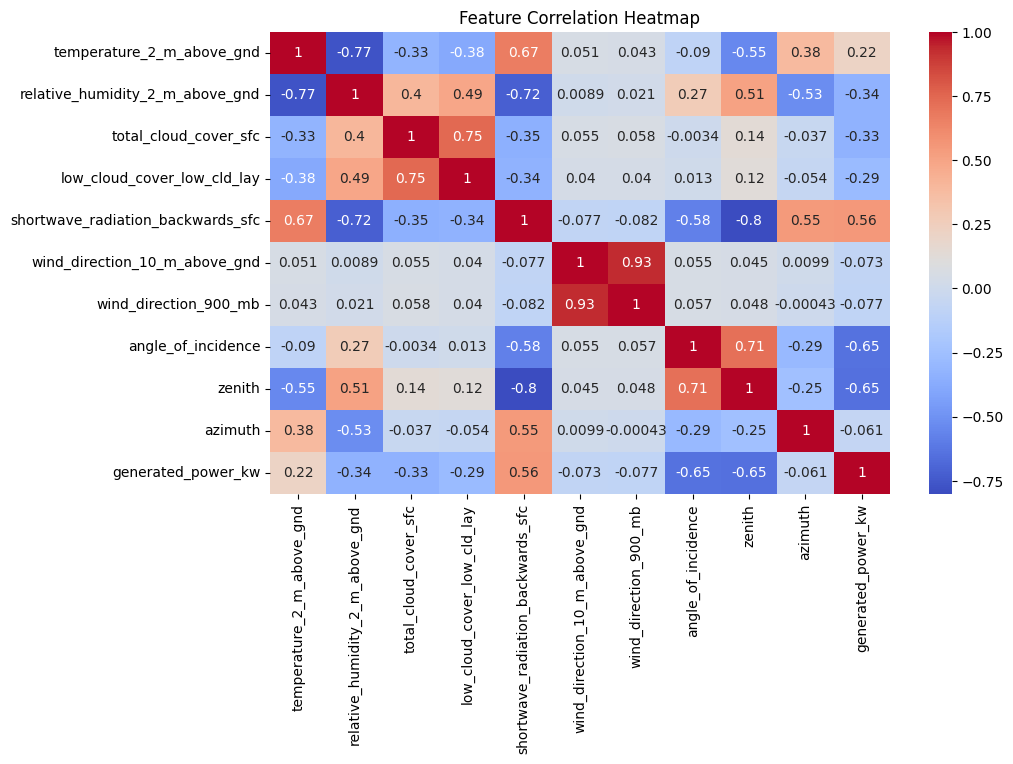

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.join(y).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

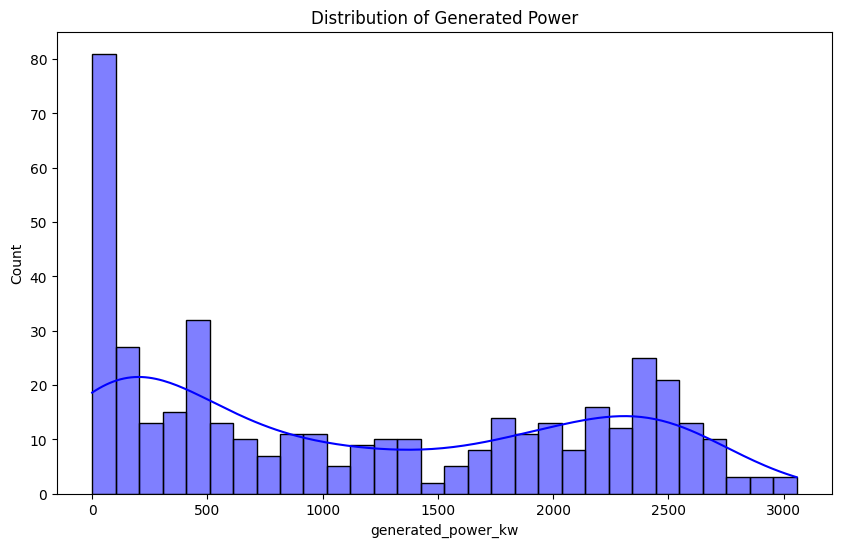

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(y.sample(frac=0.1, random_state=42), bins=30, kde=True, color='blue')
plt.title("Distribution of Generated Power")
plt.show()

<ipython-input-20-d6cdb9bbb435>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x=sampled_data[selected_features[0]], y='generated_power_kw', palette='pastel')


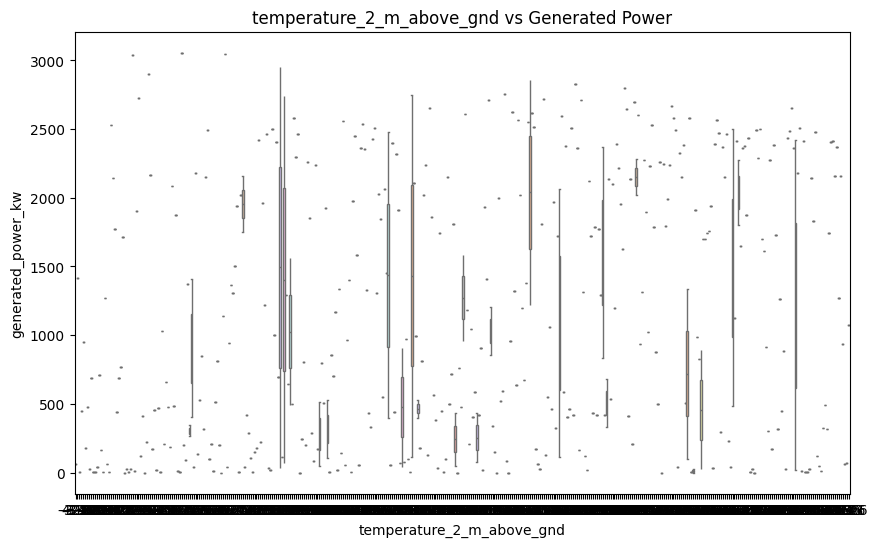

In [20]:
plt.figure(figsize=(10, 6))
sampled_data = X.join(y).sample(frac=0.1, random_state=42)
sns.boxplot(data=sampled_data, x=sampled_data[selected_features[0]], y='generated_power_kw', palette='pastel')
plt.title(f"{selected_features[0]} vs Generated Power")
plt.show()

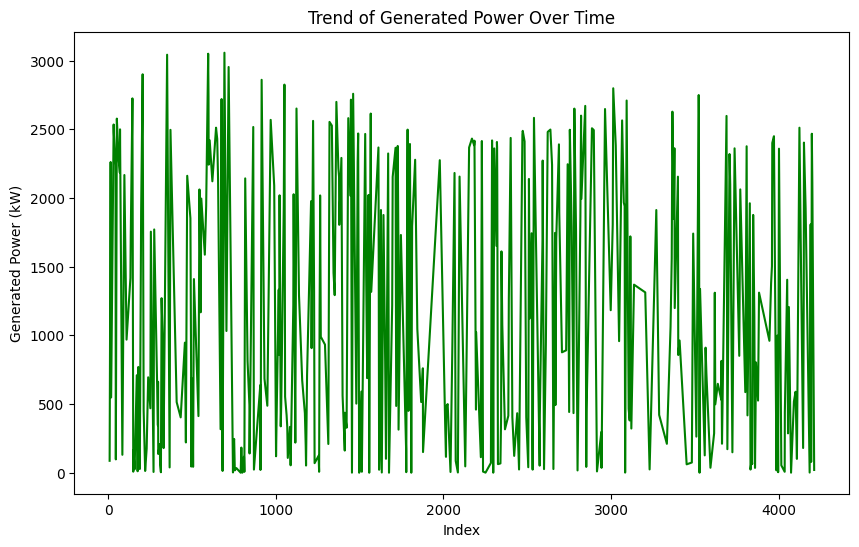

In [21]:
plt.figure(figsize=(10, 6))
sampled_data = data.sample(frac=0.1, random_state=42)
sns.lineplot(x=sampled_data.index, y=sampled_data['generated_power_kw'], color='green')
plt.title("Trend of Generated Power Over Time")
plt.xlabel("Index")
plt.ylabel("Generated Power (kW)")
plt.show()

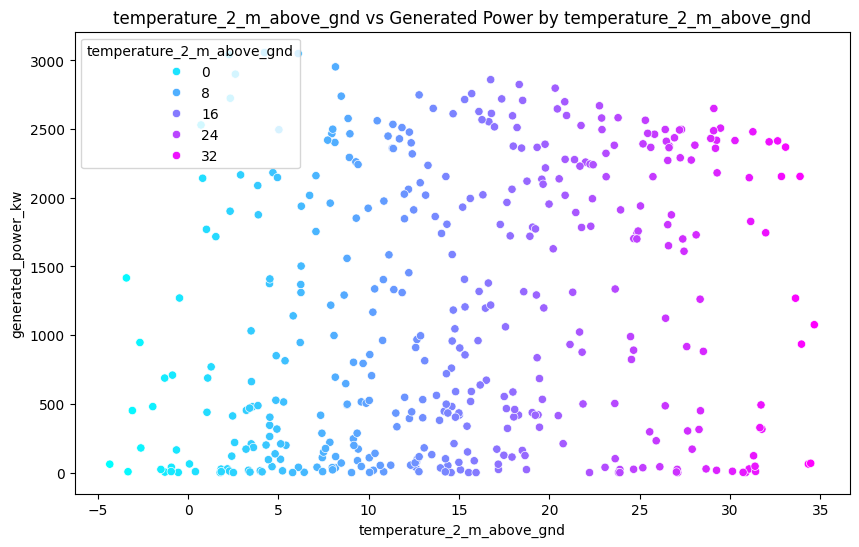

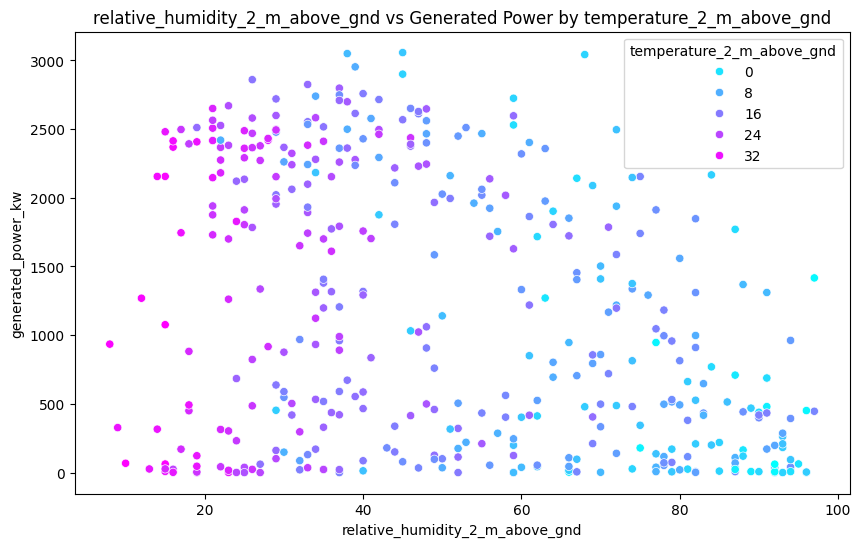

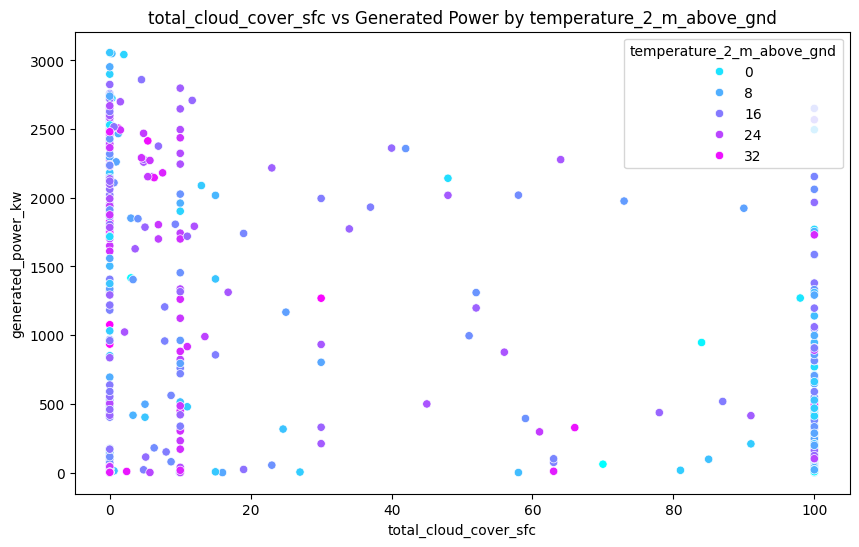

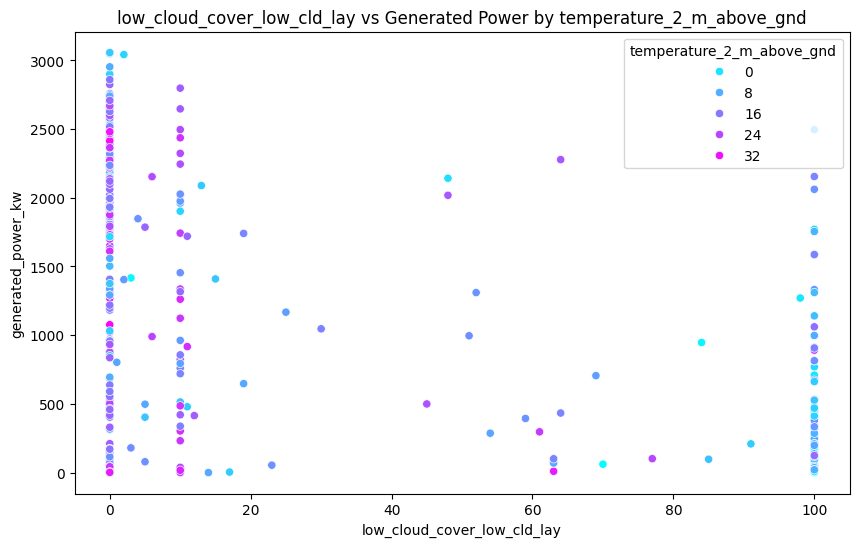

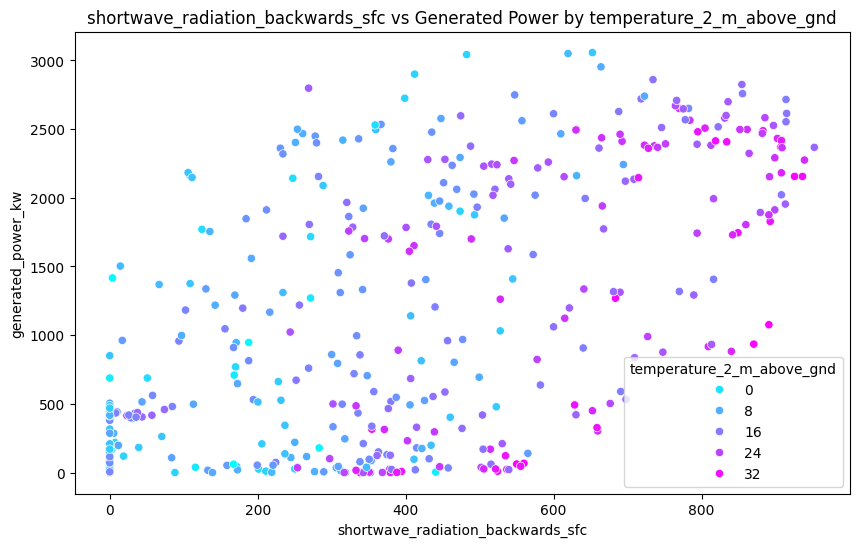

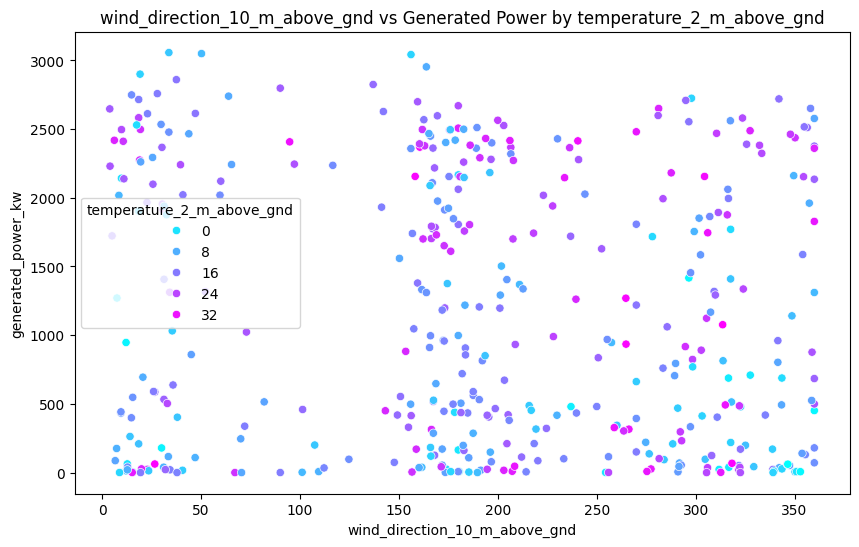

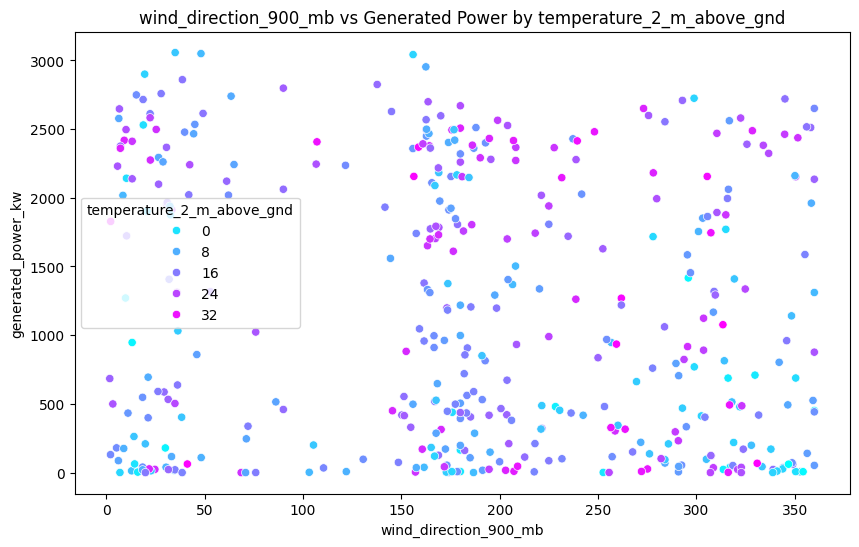

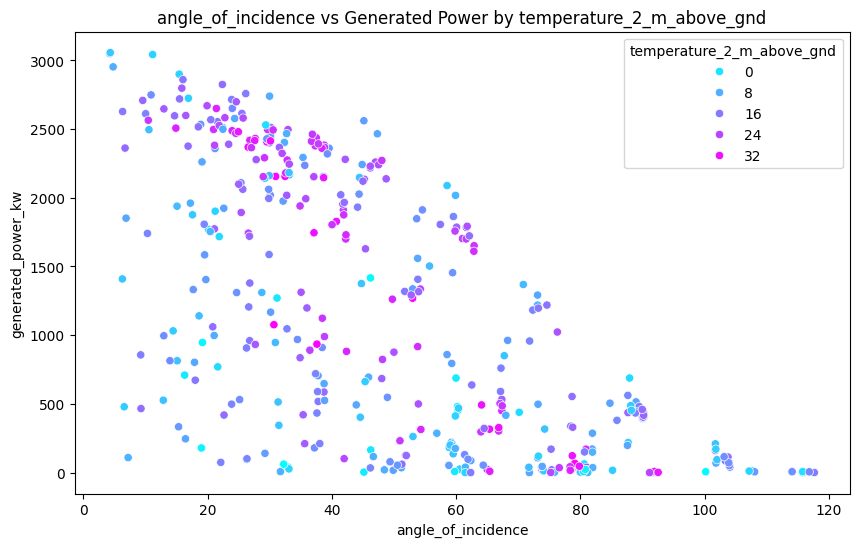

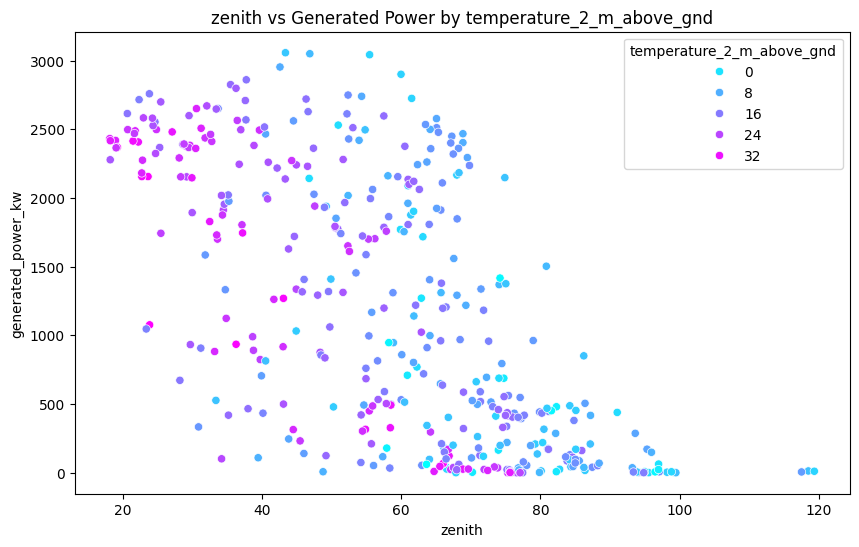

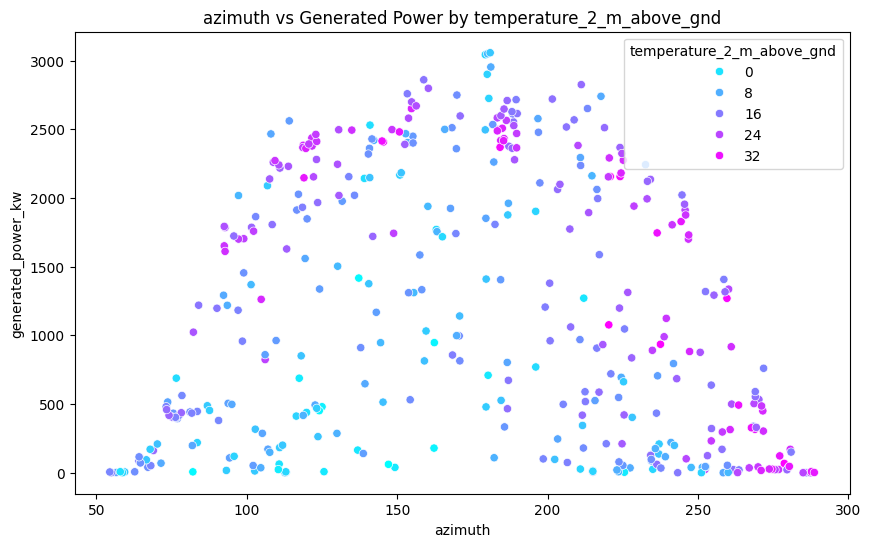

In [22]:
for feature in selected_features:
    if feature in X.columns:
        plt.figure(figsize=(10, 6))
        sampled_data = X.join(y).sample(frac=0.1, random_state=42)
        sns.scatterplot(x=sampled_data[feature], y=sampled_data['generated_power_kw'], hue=sampled_data[selected_features[0]], palette='cool')
        plt.title(f"{feature} vs Generated Power by {selected_features[0]}")
        plt.show()

<ipython-input-23-72877ed36a61>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=sampled_data, x=selected_features[1], y='generated_power_kw', palette='viridis')


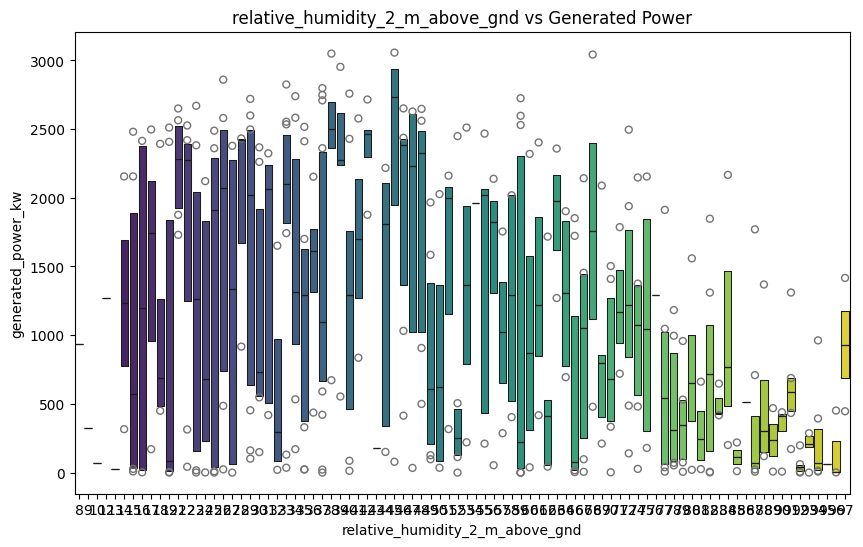

In [23]:
plt.figure(figsize=(10, 6))
sampled_data = X.join(y).sample(frac=0.1, random_state=42)
sns.boxenplot(data=sampled_data, x=selected_features[1], y='generated_power_kw', palette='viridis')
plt.title(f"{selected_features[1]} vs Generated Power")
plt.show()

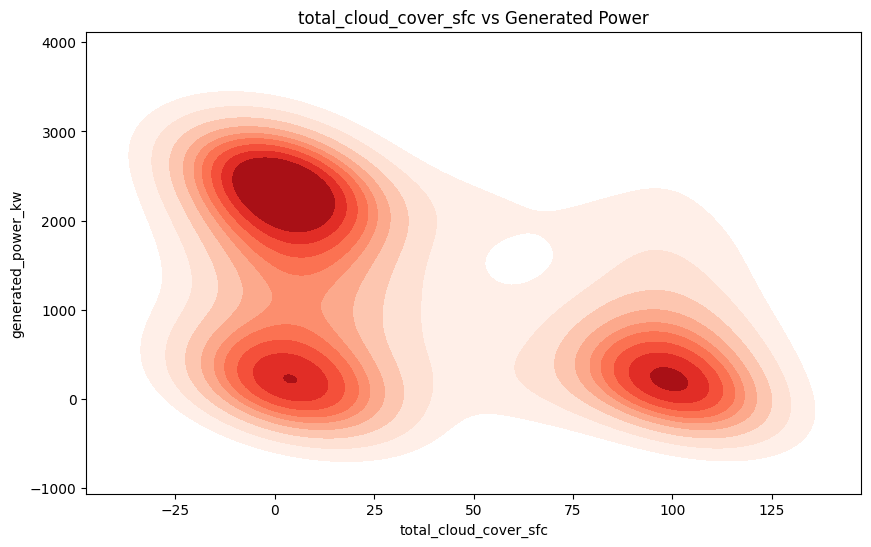

In [24]:
plt.figure(figsize=(10, 6))
sampled_data = X.join(y).sample(frac=0.1, random_state=42)
sns.kdeplot(data=sampled_data, x=selected_features[2], y='generated_power_kw', cmap="Reds", fill=True)
plt.title(f"{selected_features[2]} vs Generated Power")
plt.show()


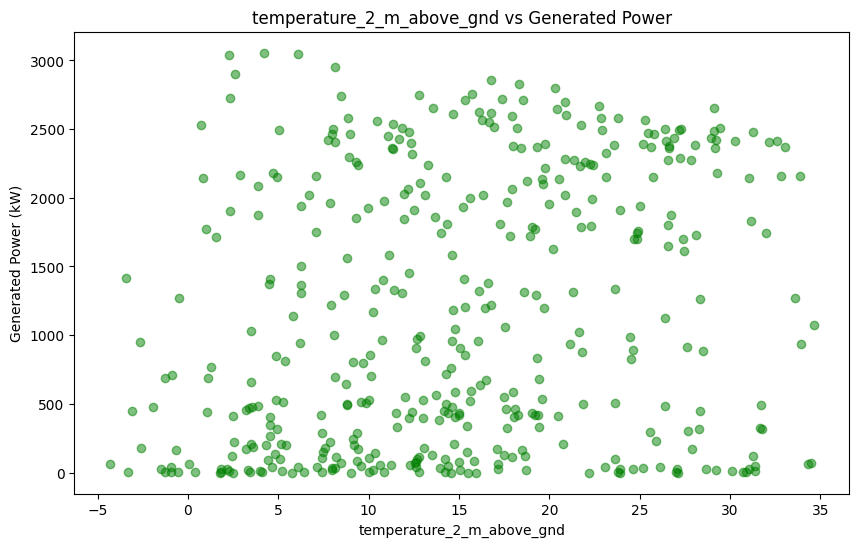

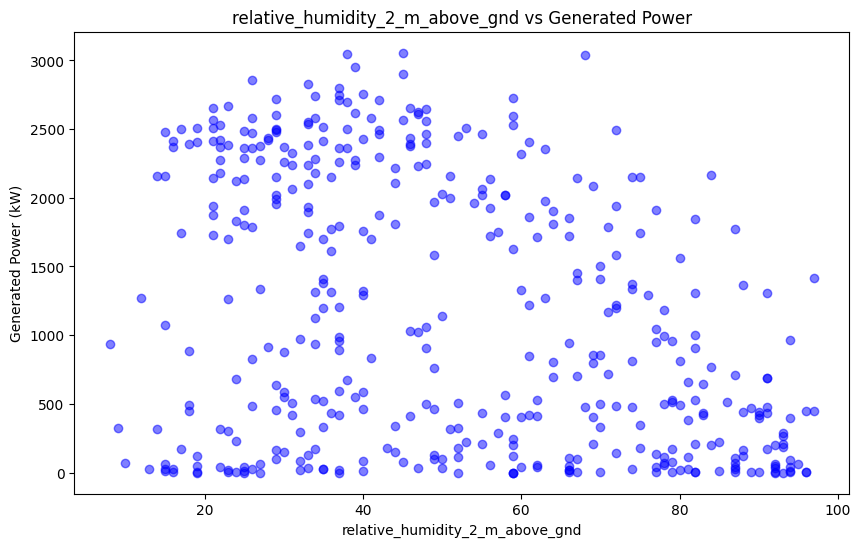

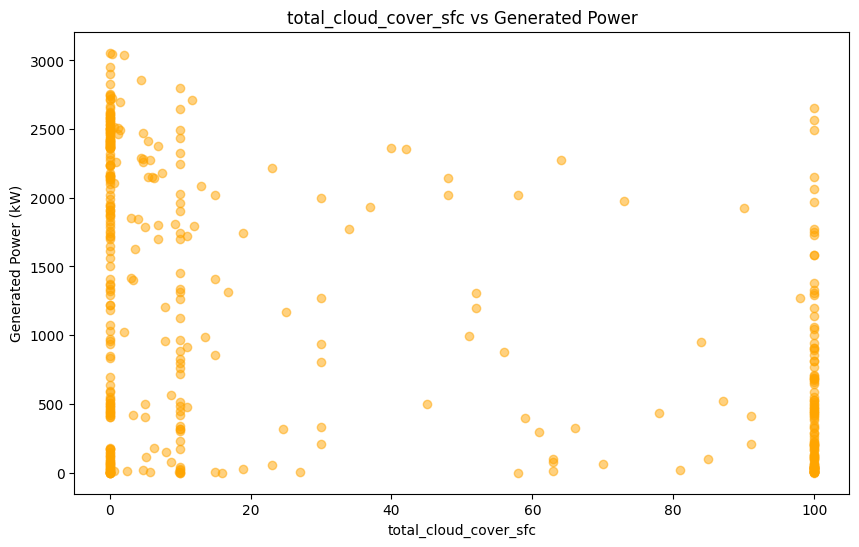

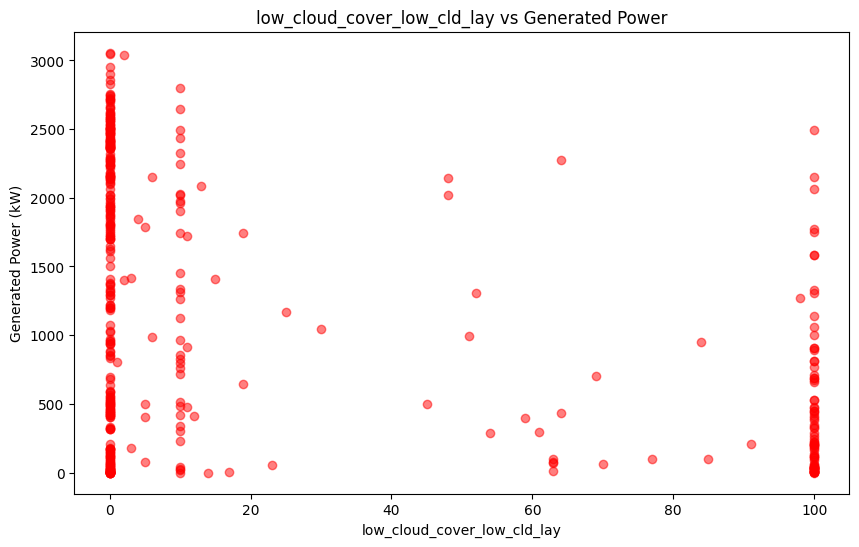

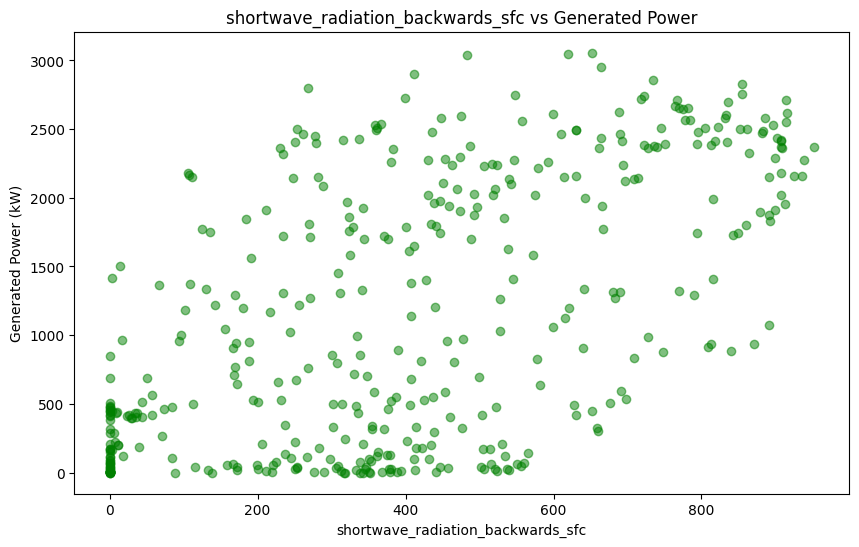

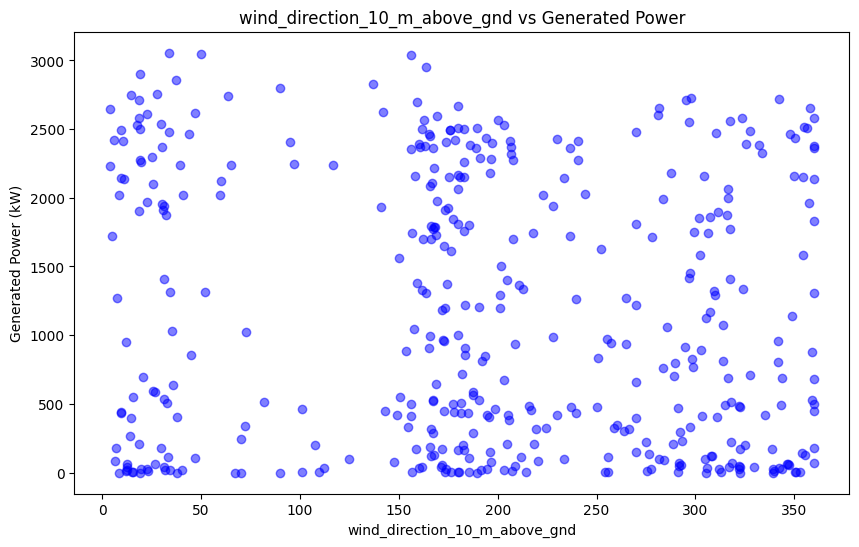

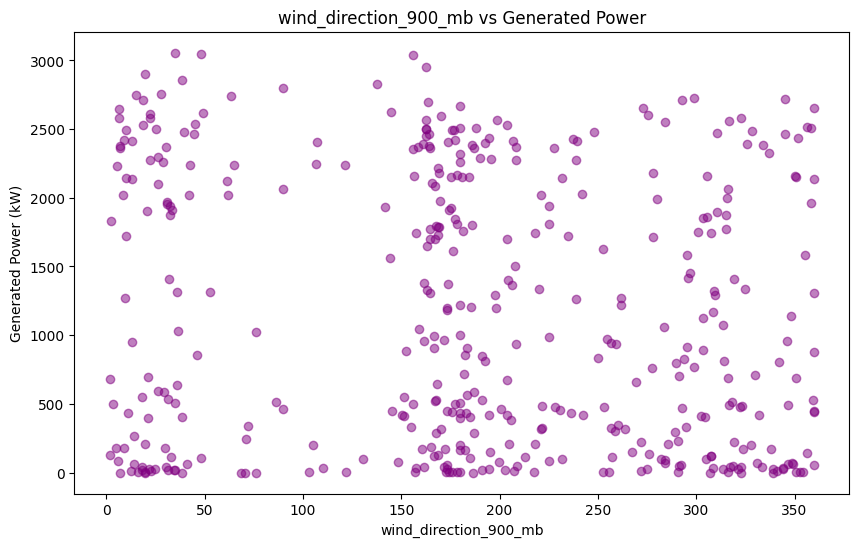

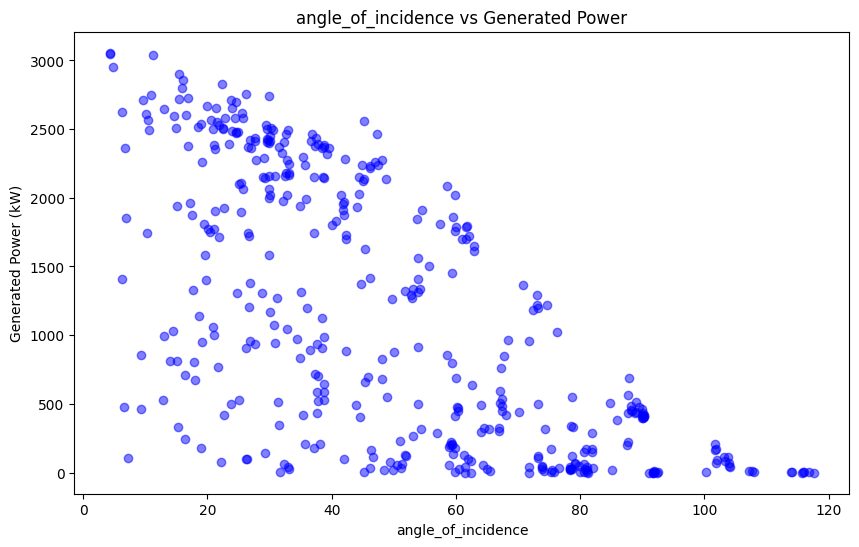

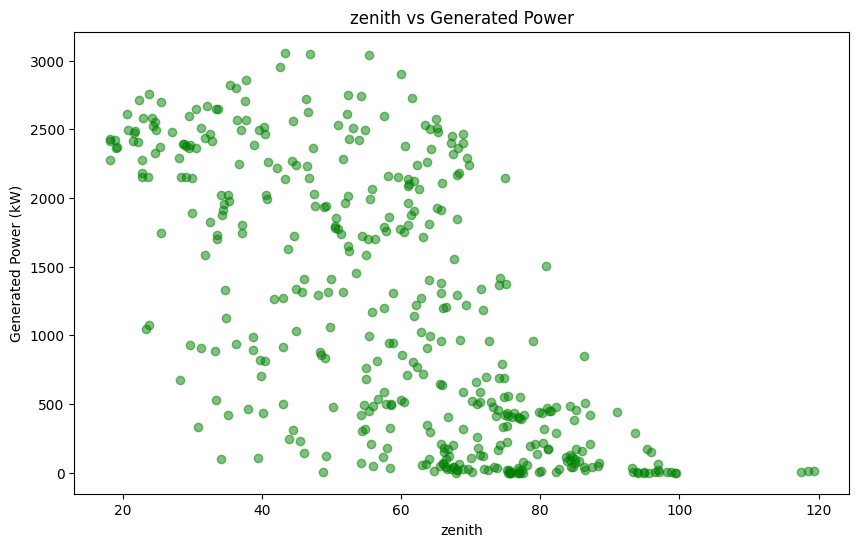

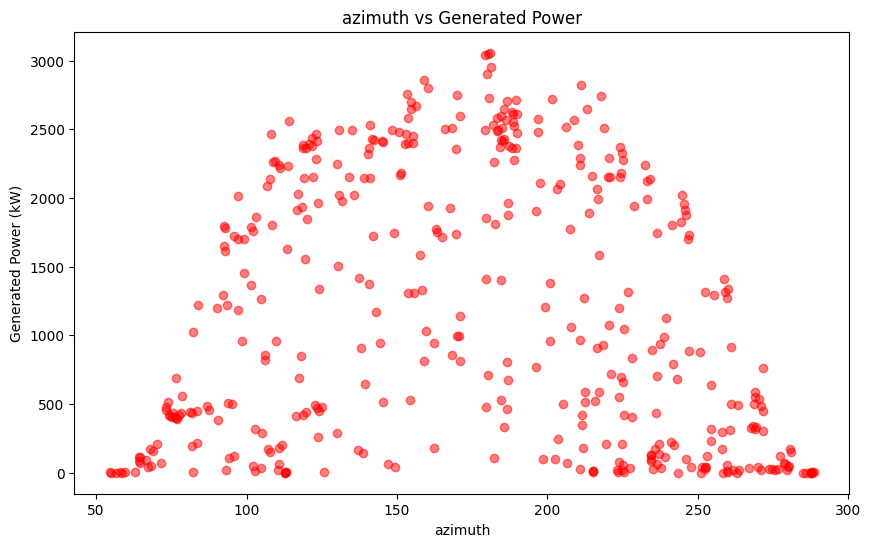

In [28]:
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sampled_data = X.sample(frac=0.1, random_state=42)
    plt.scatter(sampled_data[feature], y.loc[sampled_data.index], alpha=0.5, color=np.random.choice(['orange', 'purple', 'green', 'red', 'blue']))
    plt.title(f"{feature} vs Generated Power")
    plt.xlabel(feature)
    plt.ylabel("Generated Power (kW)")
    plt.show()

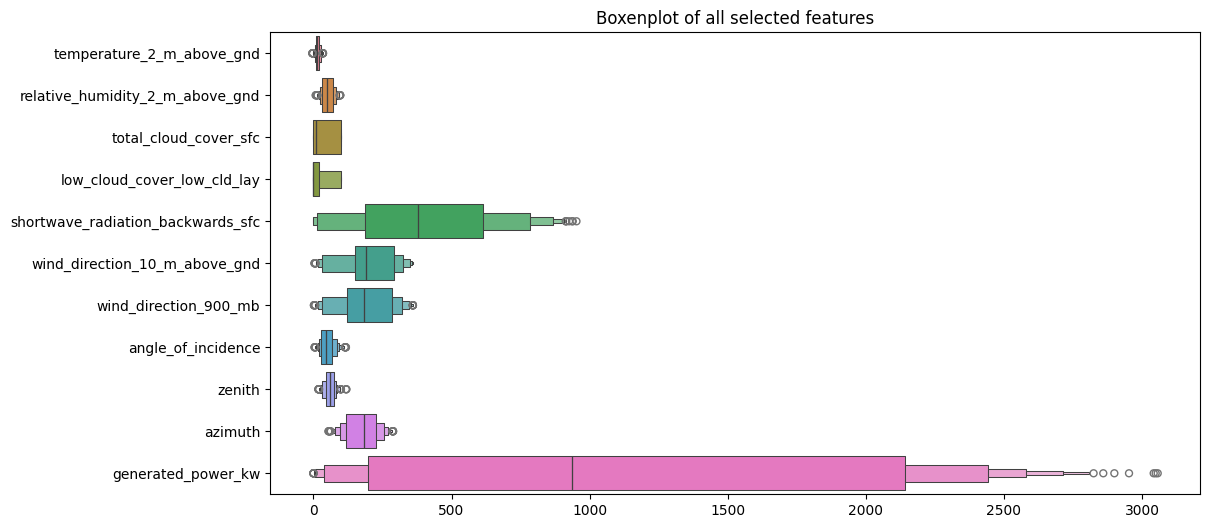

In [34]:
# Boxenplot for all selected features
plt.figure(figsize=(12,6))
sns.boxenplot(data=X.join(y).sample(frac=0.1, random_state=42), orient="h")
plt.title("Boxenplot of all selected features")
plt.show()

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


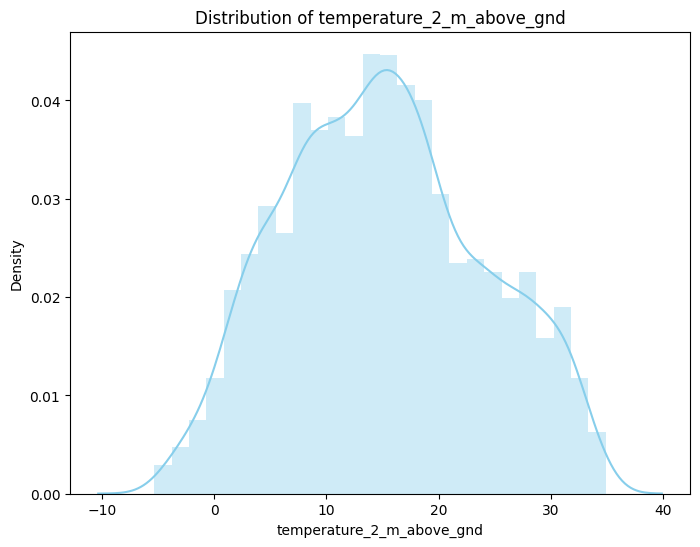

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


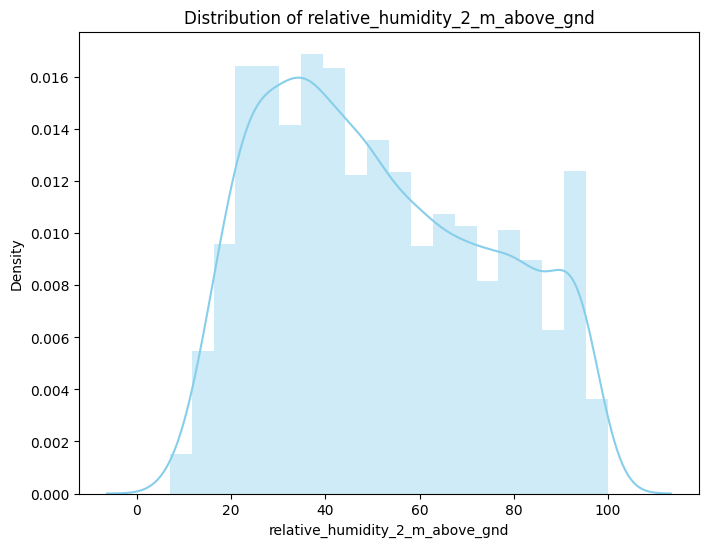

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


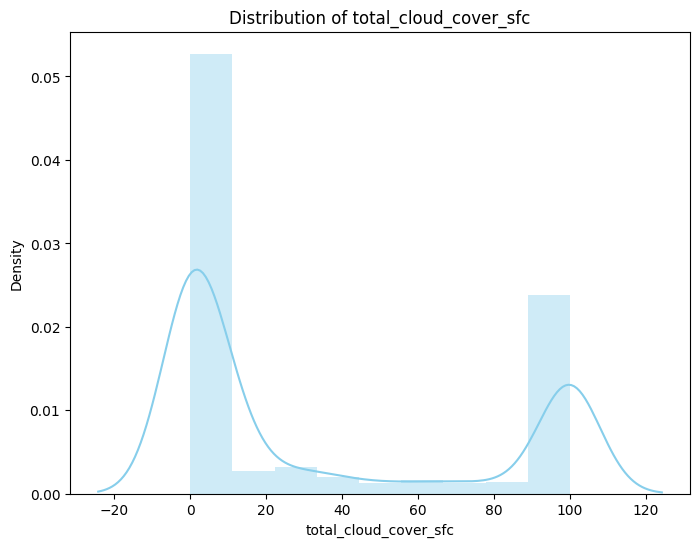

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


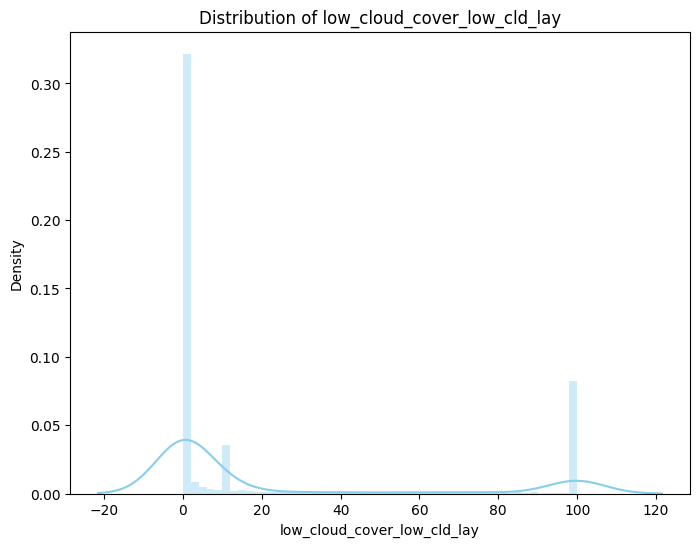

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


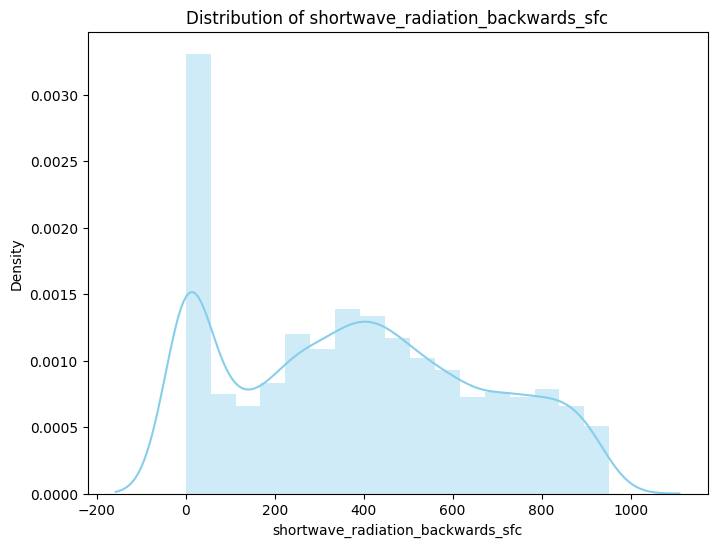

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


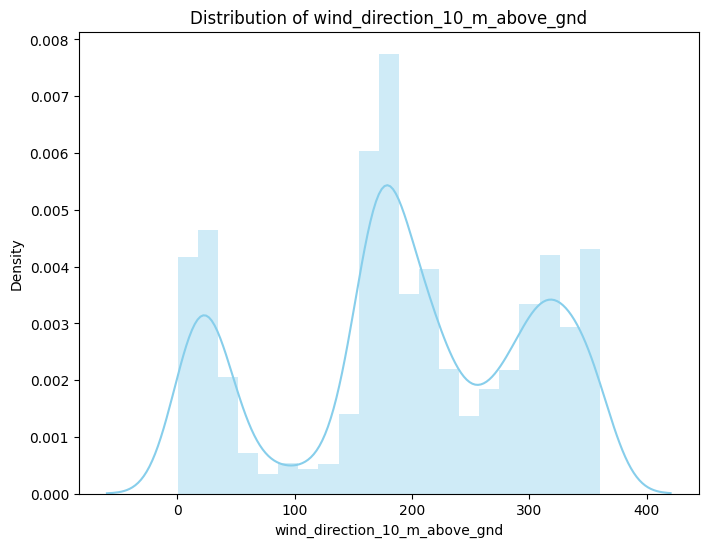

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


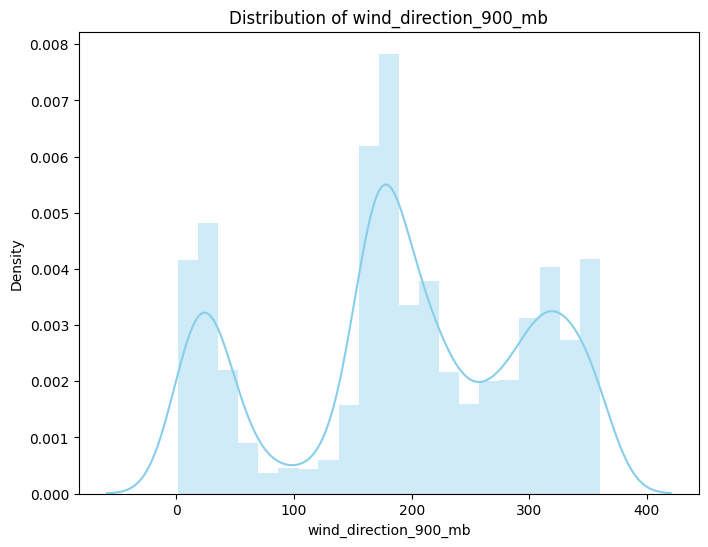

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


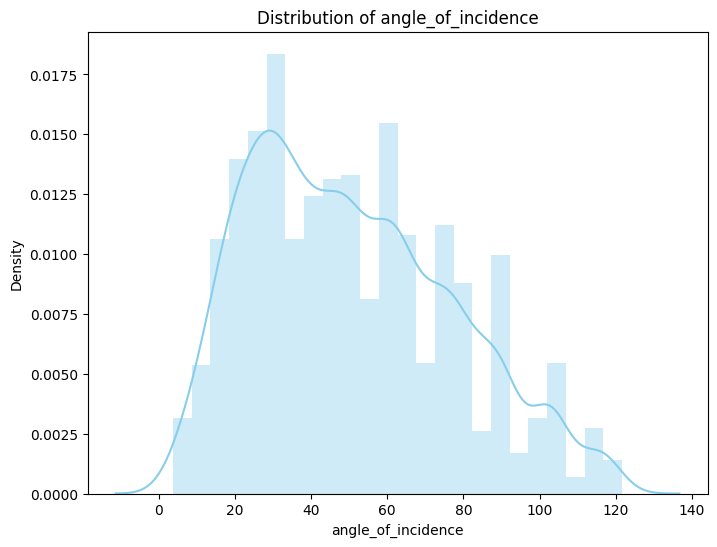

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


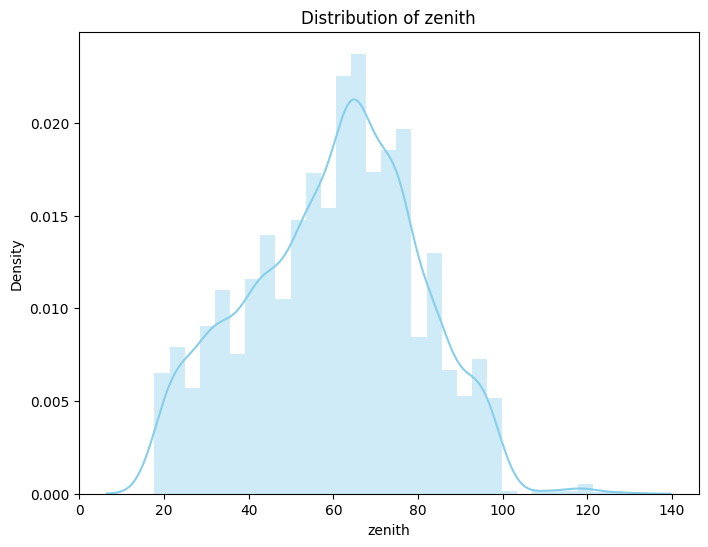

<ipython-input-35-c8190a987f9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[feature], color='skyblue', kde=True)


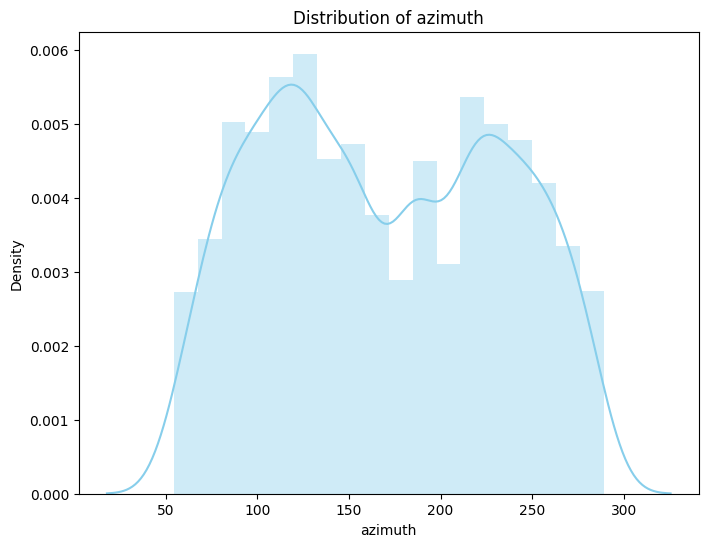

In [35]:
# Distplot for all selected features
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.distplot(X[feature], color='skyblue', kde=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature}')
    plt.show()


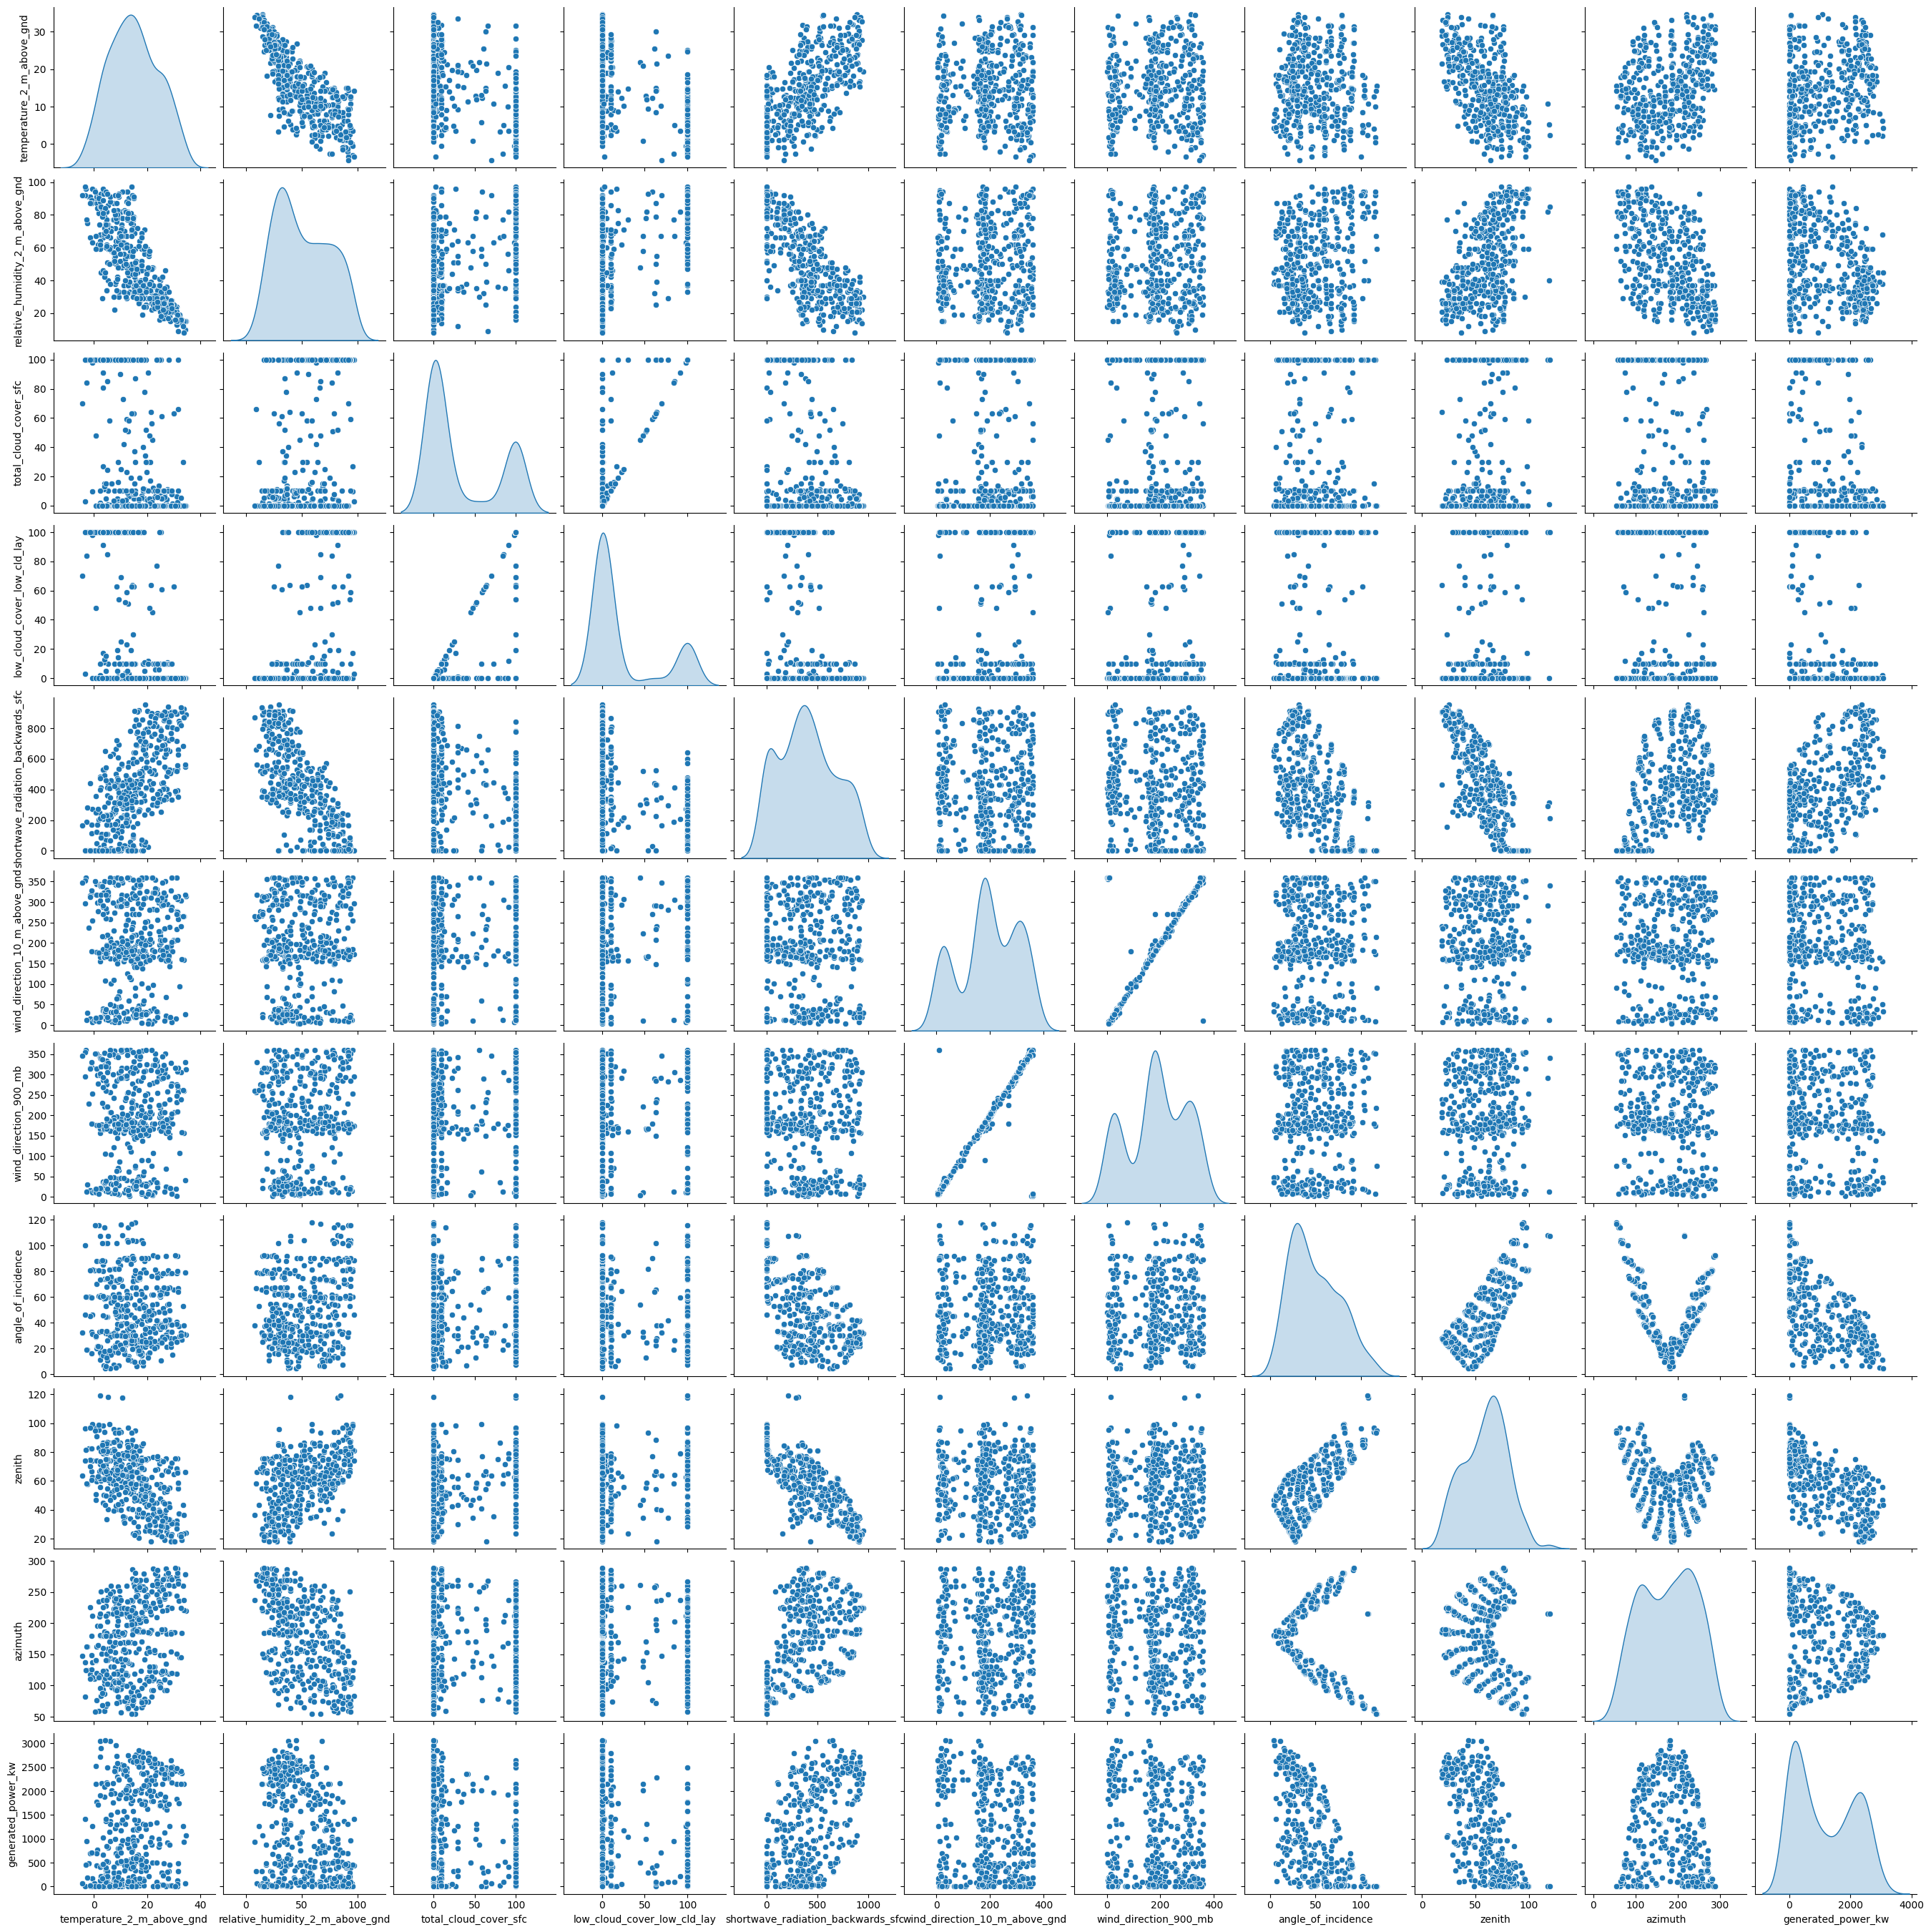

In [36]:
sns.pairplot(X.join(y).sample(frac=0.1, random_state=42), diag_kind='kde')
plt.show()